# 03. Lab exercises, Linear regression

----

1 Implement linear regression using SVD. (use np.linalg.svd). Write a class for linear regression, using the following template


    ```
    class LinReg():
    """Linear regression class."""
    
    def __init__(self):
        """Intialize linear regression."""
        self.coefficients = None
    
    def fit(self,x_train, y_train):
        """Fit linear regression."""
        return self
    
    def predict(self,x_test):
        """Predict with linear regression."""
        return y_test
    ```
    
    
2 Application:
- A, Apply the linear regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use a 80-20% train test split. Calculate the mean squared error (MSE) of predicctions and plot the true and the predicted values on a scatterplot for both the training set and the test set. 
- B, Repeat the same with the linear regression class of scikit-learn.
- C, Compare the coefficients of the 2 implementations
- D, Apply the linear regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use 5 fold cross validation. Estimate the mean and standard deviation of the MSE of the predictions. 
- E, Compare it to the result of a KNN regression.




3 Statsmodels
- A Apply the linear regression in the statsmodels package on the whole dataset. Asses the significance of each color.
- B Iteratvely omit the least significant colors. Compare the $R^2$ of the 5 fits.
- C Validate each 5 combinations of colors using cross validation on 5 folds using your linear regression class or the scikit-learn linear regression class. How does the MSE change after omitting the color? Which is best combination of inputs?
- D, Repeat execise C using a KNN regressor, do you see similar behaviour?


4 Inspection 
- A, Select the best combination of inputs found in 3/C, fit the whole dataset, and inspect the residuals of the fit, on a residual plot, is the a clear trend? 
- B, Inspect the residuals of the fit, on a residual plot, identify and color outliers, where residual are larger than 3 $
\sigma$.
- C, Identify high levarage points.


5 Interactions, quadratic

- A, Select the best combination of inputs found in 3/C and add interaction to the data and inspect its siginifcance using the whole dataset.
- B, Validate the added interaction using cross validation on 5 folds using your linear regression class or the scikit-learn linear regression class. How does the MSE change after adding interactions?
- C, Add quadratic form of the colors as predictive variable. Asses the significance of the quadratic terms. Which quadratic term is significant?
- D, Create the final model by adding the siginificant quadratic term. Validate this model Using cross validation on 5 folds using your linear regression class or the scikit-learn linear regression class. Inspect the final MSE, and compare it to the original, the one with the best colors, and the one with interactions. 
---


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1 Implement linear regression using SVD. (use np.linalg.svd). Write a class for linear regression, using the following template


    ```
    class LinReg():
    """Linear regression class."""
    
    def __init__(self):
        """Intialize linear regression."""
        self.coefficients = None
    
    def fit(self,x_train, y_train):
        """Fit linear regression."""
        return self
    
    def predict(self,x_test):
        """Predict with linear regression."""
        return y_test
    ```

In [2]:
class LinReg():
    """Linear regression class."""
    
    def __init__(self):
        """Intialize linear regression."""
        self.coefficients = None
    
    def fit(self,x_train, y_train):
        """Fit linear regression."""
        # make matrices
        A = np.column_stack((np.ones(len(x_train)),x_train))
        b = y_train
        
        # perform SVD
        U, w ,VT = np.linalg.svd(A, full_matrices=False)
        
        # just write the formula
        self.coefficients = np.sum([(np.dot(U[:,i], b)/wi) * VT[i,:] 
                                    for i,wi in enumerate(w)], axis=0)

        return self
    
    def predict(self,x_test):
        """Predict with linear regression."""
        y_test = np.column_stack((np.ones(len(x_test))
                                  ,x_test)).dot(self.coefficients)
        return y_test

## 2 Application:
- A, Apply the linear regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use a 80-20% train test split. Calculate the mean squared error (MSE) of predicctions and plot the true and the predicted values on a scatterplot for both the training set and the test set. 


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### Load data

In [4]:
df = pd.read_csv('../data/photoz_mini.csv')  # load train data
x = df[['u','g','r','i','z']].values  # format x as scipy expects it
y = df['redshift'].values  # format y as scipy expects it

In [5]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2)

### Apply the class

In [6]:
%%time
mylr = LinReg()
mylr.fit(x_train, y_train)
myyp_train = mylr.predict(x_train)
myyp_test = mylr.predict(x_test)

CPU times: user 190 ms, sys: 6.55 ms, total: 197 ms
Wall time: 189 ms


### Plot it

(0, 1)

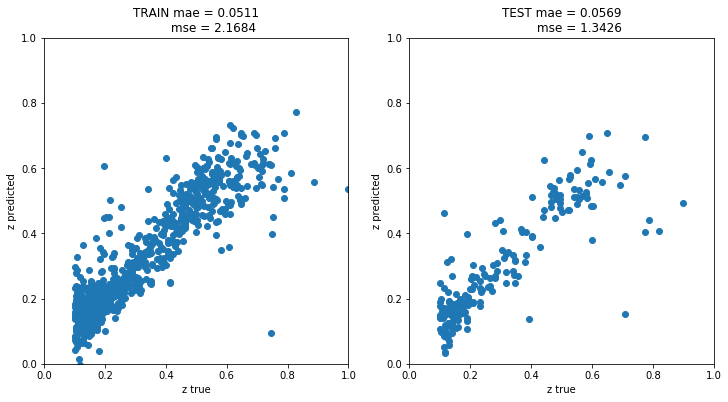

In [7]:
figsize(12,6)
plt.subplot(1,2,1)
plot(y_train, myyp_train,'o')
xlabel('z true')
ylabel('z predicted')
ttl = 'TRAIN mae = %.4f' % np.mean(np.abs(y_train-myyp_train))
ttl += '\n         mse = %.4f' % np.linalg.norm(y_train-myyp_train,2) 
title(ttl)
xlim(0,1)
ylim(0,1)

plt.subplot(1,2,2)
plot(y_test, myyp_test,'o')

xlabel('z true')
ylabel('z predicted')
ttl = 'TEST mae = %.4f' % np.mean(np.abs(y_test-myyp_test))
ttl += '\n         mse = %.4f' % np.linalg.norm(y_test-myyp_test,2) 
title(ttl)
xlim(0,1)
ylim(0,1)

## 2 Application:
- B, Repeat the same with the linear regression class of scikit-learn.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
%%time
lreg = LinearRegression()
lreg.fit(x_train, y_train)
yp_train = lreg.predict(x_train)
yp_test = lreg.predict(x_test)

CPU times: user 4.55 ms, sys: 419 µs, total: 4.97 ms
Wall time: 3.57 ms


(0, 1)

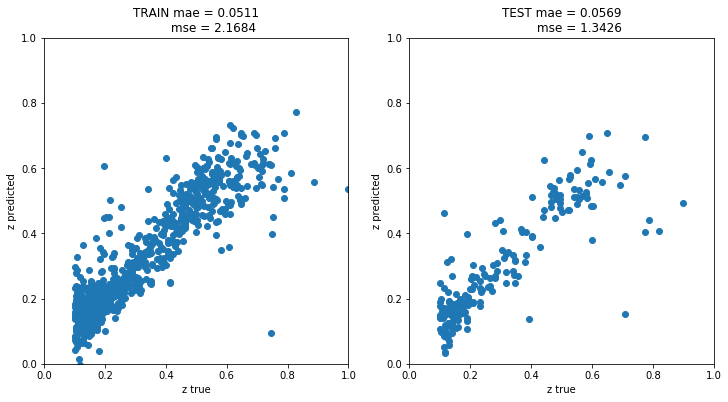

In [10]:
figsize(12,6)
plt.subplot(1,2,1)
plot(y_train, yp_train,'o')
xlabel('z true')
ylabel('z predicted')
ttl = 'TRAIN mae = %.4f' % np.mean(np.abs(y_train-yp_train))
ttl += '\n         mse = %.4f' % np.linalg.norm(y_train-yp_train,2) 
title(ttl)
xlim(0,1)
ylim(0,1)

plt.subplot(1,2,2)
plot(y_test, yp_test,'o')

xlabel('z true')
ylabel('z predicted')
ttl = 'TEST mae = %.4f' % np.mean(np.abs(y_test-yp_test))
ttl += '\n         mse = %.4f' % np.linalg.norm(y_test-yp_test,2) 
title(ttl)
xlim(0,1)
ylim(0,1)

## 2 Application:
- C, Compare the coefficients of the 2 implementations

### Answer: the coefficients are the same

In [11]:
print mylr.coefficients
print lreg.intercept_, lreg.coef_

[-1.39683966 -0.01341133  0.03100846  0.31563485 -0.22479868 -0.02563066]
-1.39683965577 [-0.01341133  0.03100846  0.31563485 -0.22479868 -0.02563066]


## 2 Application:
- D, Apply the linear regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use 5 fold cross validation. Estimate the mean and standard deviation of the MSE of the predictions. 
- E, Compare it to the result of a KNN regression.



### Answer: MSE is = 10.7127 +/- 0.6217 but KNN is more accurate

In [12]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [13]:
%%time

def my_kfold(model, x, y):
    kf = KFold(n_splits=5)
    mses = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lreg = model()
        lreg.fit(x_train, y_train)
        yp = lreg.predict(x_test)
        mses.append(np.linalg.norm(y_test-yp,1))
    print 'mses = %.4f +/- %.4f' % (np.mean(mses), np.std(mses, ddof=1))  # note ddof!
    
my_kfold(LinReg, x, y)
my_kfold(KNeighborsRegressor, x, y)

mses = 10.7127 +/- 0.6217
mses = 9.9352 +/- 0.4864
CPU times: user 33.4 ms, sys: 2.39 ms, total: 35.8 ms
Wall time: 17.7 ms


## 3 Statsmodels
- A Apply the linear regression in the statsmodels package on the whole dataset. Asses the significance of each color. 

### Answer : Color z does not seem to be too significant

In [14]:
import statsmodels.formula.api as smf

In [15]:
results = smf.ols('redshift ~ u + g + r + i + z ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     890.4
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:29   Log-Likelihood:                 1099.9
No. Observations:                1000   AIC:                            -2188.
Df Residuals:                     994   BIC:                            -2158.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3883      0.058    -24.084      0.0

## 3 Statsmodels
- B Iteratvely omit the least significant colors. Compare the $R^2$ of the 5 fits.



### Anser: I omitted z, u, g, i , 

The R-square did not drop first, then it dropped from 0.817 to 0.815, then to 0.814 and then to 0.75. Onlyn the last drop is large.

In [16]:
results = smf.ols('redshift ~  u + g + r + i  ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:29   Log-Likelihood:                 1097.7
No. Observations:                1000   AIC:                            -2185.
Df Residuals:                     995   BIC:                            -2161.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3721      0.057    -23.971      0.0

In [17]:
results = smf.ols('redshift ~  g + r + i  ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1458.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:29   Log-Likelihood:                 1092.0
No. Observations:                1000   AIC:                            -2176.
Df Residuals:                     996   BIC:                            -2156.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5034      0.042    -35.557      0.0

In [18]:
results = smf.ols('redshift ~  r + i  ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2180.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:29   Log-Likelihood:                 1090.2
No. Observations:                1000   AIC:                            -2174.
Df Residuals:                     997   BIC:                            -2160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4761      0.040    -37.100      0.0

In [19]:
results = smf.ols('redshift ~  r   ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2994.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          1.07e-302
Time:                        17:42:29   Log-Likelihood:                 942.65
No. Observations:                1000   AIC:                            -1881.
Df Residuals:                     998   BIC:                            -1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8514      0.040    -46.705      0.0

## 3 Statsmodels
- C Validate each 5 combinations of colors using cross validation on 5 folds using your linear regression class of the scikit-learn linear regression class. How does the MSE change after omitting the color?




### Answer : Error drops until R+E ! That seems to be the best combination altough not siginificantly.

In [20]:
my_kfold(LinReg, df[['u','g','r','i','z']].values, y)
my_kfold(LinReg, df[['u','g','r','i']].values, y)
my_kfold(LinReg, df[['g','r','i']].values, y)
my_kfold(LinReg, df[['r','i']].values, y)
my_kfold(LinReg, df[['i']].values, y)

mses = 10.7127 +/- 0.6217
mses = 10.6228 +/- 0.5640
mses = 10.5756 +/- 0.6706
mses = 10.5567 +/- 0.7091
mses = 14.6646 +/- 0.9421


## 3 Statsmodels

- D, Repeat execise C using a KNN regressor, do you see similar behaviour?



### Answer: Yes kinda, error siginificantly drops after the first 2 deletions

In [21]:
my_kfold(KNeighborsRegressor, df[['u','g','r','i','z']].values, y)
my_kfold(KNeighborsRegressor, df[['u','g','r','i']].values, y)
my_kfold(KNeighborsRegressor, df[['g','r','i']].values, y)
my_kfold(KNeighborsRegressor, df[['r','i']].values, y)
my_kfold(KNeighborsRegressor, df[['i']].values, y)

mses = 9.9352 +/- 0.4864
mses = 9.8629 +/- 0.5624
mses = 9.5428 +/- 0.6110
mses = 10.3907 +/- 0.3814
mses = 14.3840 +/- 0.6655


## 4 Inspection 
- A, Select the best combination of inputs found in 3/C and inspect the residuals of the fit, on a residual plot, is the a clear trend? 
- B, Inspect the residuals of the fit, on a residual plot, identify and color outliers, where residual are larger than 3 $
\sigma$.

### Answer: actually there seems to be a trend

In [22]:
mylr = LinReg()
mylr.fit(df[['r','i']].values,y)
yp = mylr.predict(df[['r','i']].values)

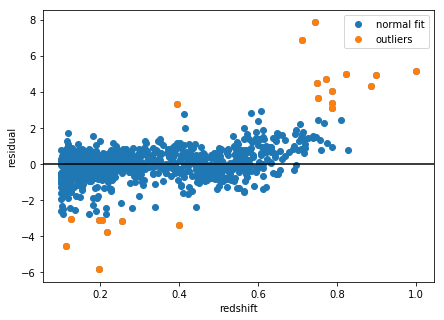

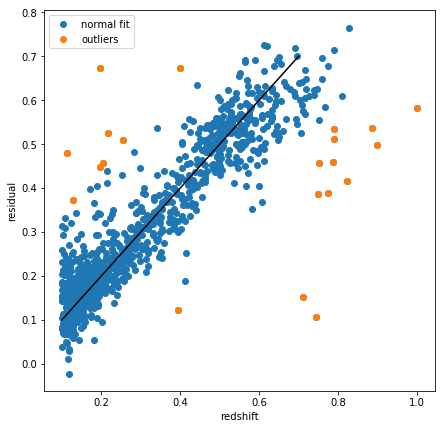

In [23]:
figsize(7,5)
res =  (y-yp)/(np.sqrt(np.mean((y-yp)**2)))
plot(y,res,"o", label="normal fit")
idx = np.abs(res)>3
plot(y[idx],res[idx],"o",label="outliers")    
legend()
xlabel('redshift')
ylabel('residual')
axhline(0,c='k')
show()

figsize(7,7)
res =  (y-yp)/(np.sqrt(np.mean((y-yp)**2)))
plot(y,yp,"o", label="normal fit")
idx = np.abs(res)>3
plot(y[idx],yp[idx],"o",label="outliers")    
legend()
xlabel('redshift')
ylabel('residual')
plot([0.1,0.7],[0.1,0.7], c='k')

## 4 Inspection 
- C, Identify high levarage points.



In [24]:
import statsmodels.api as sm

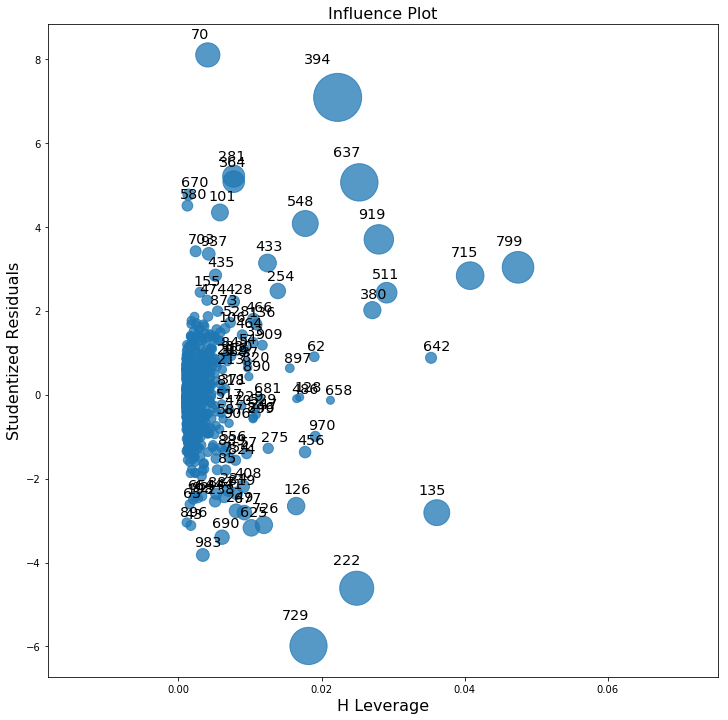

In [25]:
figsize(12,12)
results = smf.ols('redshift ~  r + i  ', data=df).fit()
sm.graphics.influence_plot(results, criterion="cooks");

## 5 Interactions, quadratic

- A, Select the best combination of inputs found in 3/C and add interaction to the data and inspect its siginifcance using the whole dataset.

### Answer: R+I interaction actually helps!

In [26]:
inter = smf.ols('redshift ~ r + i ', data=df).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2180.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:31   Log-Likelihood:                 1090.2
No. Observations:                1000   AIC:                            -2174.
Df Residuals:                     997   BIC:                            -2160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4761      0.040    -37.100      0.0

In [27]:
inter = smf.ols('redshift ~ r + i + r*i ', data=df).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:31   Log-Likelihood:                 1103.0
No. Observations:                1000   AIC:                            -2198.
Df Residuals:                     996   BIC:                            -2178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0583      0.499      2.121      0.0

## 5 Interactions, quadratic

- B, Validate the added interaction using cross validation on 5 folds using your linear regression class or the scikit-learn linear regression class. How does the MSE change after adding interactions?

### Answer: Yay, it helps in CV too

In [28]:
r, i = df[['r']].values, df[['i']].values
xint = np.column_stack([r,i,r*i])
my_kfold(LinReg, df[['r','i']].values, y)
my_kfold(LinReg, xint, y)

mses = 10.5567 +/- 0.7091
mses = 10.2045 +/- 0.6687


## 5 Interactions, quadratic

- C, Add quadratic form of the colors as predictive variable. Asses the significance of the quadratic terms. Which quadratic term is significant?


### Answer: r^2 quatratic term helps, i^2 is not significant

In [29]:
inter = smf.ols('redshift ~ r + i + np.power(r, 2) + np.power(i, 2)+ r*i ', data=df).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     923.4
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:31   Log-Likelihood:                 1114.9
No. Observations:                1000   AIC:                            -2218.
Df Residuals:                     994   BIC:                            -2188.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9476      0.503      1.

In [30]:
inter = smf.ols('redshift ~ r + i + np.power(i, 2)+ r*i ', data=df).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:               redshift   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1153.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:42:31   Log-Likelihood:                 1113.9
No. Observations:                1000   AIC:                            -2218.
Df Residuals:                     995   BIC:                            -2193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0815      0.494      2.

## 5 Interactions, quadratic

- D, Create the final model by adding the siginificant quadratic term. Validate this model Using cross validation on 5 folds using your linear regression class or the scikit-learn linear regression class. Inspect the final MSE, and compare it to the original, the one with the best colors, and the one with interactions. 




In [31]:
r, i = df[['r']].values, df[['i']].values
xfinal = np.column_stack([r,i,r*i,r*r])

my_kfold(LinReg, x, y)
my_kfold(LinReg, df[['r','i']].values, y)
my_kfold(LinReg, xint, y)
my_kfold(LinReg, xfinal, y)

mses = 10.7127 +/- 0.6217
mses = 10.5567 +/- 0.7091
mses = 10.2045 +/- 0.6687
mses = 9.9400 +/- 0.7365


### The end

### BTW: Interactions or quadratic forms did not fix trend in residuals ...

In [32]:
mylr = LinReg()
mylr.fit(xfinal,y)
yp = mylr.predict(xfinal)

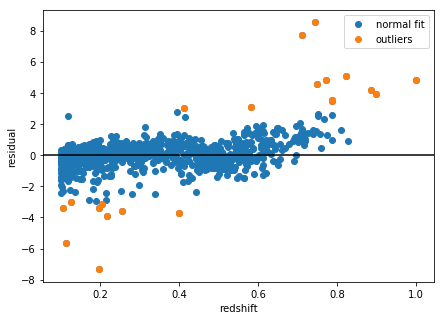

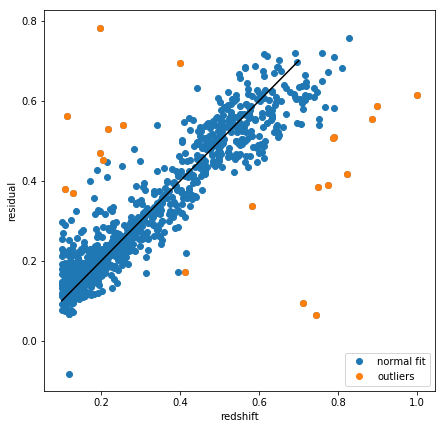

In [33]:
figsize(7,5)
res =  (y-yp)/(np.sqrt(np.mean((y-yp)**2)))
plot(y,res,"o", label="normal fit")
idx = np.abs(res)>3
plot(y[idx],res[idx],"o",label="outliers")    
legend()
xlabel('redshift')
ylabel('residual')
axhline(0,c='k')
show()

figsize(7,7)
res =  (y-yp)/(np.sqrt(np.mean((y-yp)**2)))
plot(y,yp,"o", label="normal fit")
idx = np.abs(res)>3
plot(y[idx],yp[idx],"o",label="outliers")    
legend()
xlabel('redshift')
ylabel('residual')
plot([0.1,0.7],[0.1,0.7], c='k')